<a href="https://colab.research.google.com/github/sidharth178/The-Battle-of-Neighborhoods-Capstone-Project/blob/master/The_Battle_Of_Neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**===========The Battle Of Neighborhoods============**</center>

<img align="center" src="https://drive.google.com/uc?export=view&id=16XgH-aYQ1Uj2AvXC4QS40nBMedl96eff" alt="The Battle Of Neighborhoods">

# **1. Introduction**

### **Objective**
The objective of this project is to find the best neighbourhood in Toronto to open a Italian restaurant using Foursquare location data. In this project we’ll go through the solution for this problem for avoiding or considering low risk criteria and high success rate.
### **Target Audiance**
* Business personnel who wants to invest or open a start up company or restaurant.
* Bachelors who want to stay in a good city where they can get each facilities what they want like GYM,Playground,Parlour,Movie theatre etc.
* The freelancer who loves to have their own small company or restaurant as a side business.
* Marketing companies who want to release a new product on a best place.
* Researchers who want to create a camp for Survey.
* Torrists who wants to eat italian food.

### **Data Description**
For this project we need these following data:
1. ***Toronto City data that contains Borough, Neighborhoods along with there latitudes and longitudes***
* **Data Source:** https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
* **Description:** This Wikipedia page contain all the information we need to explore and cluster the neighborhoods in Toronto. We will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the Toronto dataset.
2. ***Geographical Location data using Geocoder Package***
* **Data Source:** https://cocl.us/Geospatial_data
* **Description:** The second source of data provided us with the Geographical coordinates of the neighbourhoods with the respective Postal Codes.
3. ***Venue Data using Foursquare API***
* **Data Source:** https://foursquare.com/developers/apps
* **Description:** From Foursquare API we can get the name,category,latitude,longitude for each venue.

In this capstone project we are going to answer of these following major steps:

* **Assignment-1:** Scrape the data from the wikipedia page of Toronto.

* **Assignment-2:**  Get the geographical coordinates of the neighborhoods using the Geocoder package.

* **Assignment-3:** Explore and cluster the neighborhoods in Toronto.

### **Blog Post(Medium)**
 Check [here](https://sidharth178.medium.com/the-battle-of-neighborhoods-f3f8bff9abf3)

# **2. Import Libraries**

In [ ]:
# install geopy to access geocoder package
!pip install geopy

In [ ]:
# install beautifulsoup4 for web scraping
!pip install beautifulsoup4

In [ ]:
# install requests to gain access to an URL
!pip install requests

In [ ]:
# install kmeans for clustering
!pip install kmeans

In [ ]:
# install folium for visualization
!pip install folium

In [ ]:
# install sklearn
!pip install -U scikit-learn

In [ ]:
# import all necessary libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from bs4 import BeautifulSoup
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# **3. Scrape Neighborhoods Data**

In [ ]:
# Get the neighborhood data using beautiful soup 
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = requests.get(url)
data_html = BeautifulSoup(result.content)

# read the data into a Pandas Dataframe
soup = BeautifulSoup(str(data_html))

In [ ]:
# loop through table, grab each of the 3 columns shown
# Scrape the neighborhood data from the table in the wikipedia page of Toronto
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
      # Create three columns named as "PostalCode","Borough" & "Neighborhood"
        cell['PostalCode'] = row.p.text[:3] # store only first three letter from the test of <p> tab.(Ex: M3A )
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        # here we replace some symbols like "(" , ")" , "/" from the neighborhood name(Ex: (Parkview Hill / Woodbine Gardens))
        table_contents.append(cell)

df=pd.DataFrame(table_contents)
# compress some big borough name by smaller one
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


This is the created dataset that we'r going to use. This dataset have 3 columns i.e "PostalCode", "Borough", "Neighborhood". As the dataset is unstructured and dirty we need some data pre-processing to clean the dataset.

In [ ]:
# save this dataframe in a CSV file
df.to_csv('Neighborhood Data.csv')

# **4. Data Pre-processing**
In this step we'll do thses following steps
- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
- If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.




In [ ]:
# drop rows having null value and value assigned as "Not assigned"
df_dropna = df.dropna()
empty = 'Not assigned'
df_dropna = df_dropna[(df_dropna.PostalCode != empty ) & (df_dropna.Borough != empty) & (df_dropna.Neighborhood != empty)].reset_index(drop=True)

In [ ]:
# check for missing value
df_dropna.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
dtype: int64

In [ ]:
# Check if we still have any Neighborhoods that are Not Assigned
df_dropna.loc[df_dropna['Borough'].isin(["Not assigned"])]

,PostalCode,Borough,Neighborhood


In [ ]:
df = df_dropna
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [ ]:
# shape of dataframe
df.shape

(103, 3)

Now  data is cleaned and all the requirements are met. So we just have to add the Latitude and Longitudes of each location.


Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. Now we are going to create a new table with the Latitudes and Longitudes corresponding to the different PostalCodes

In [ ]:
# get the latitude and the longitude coordinates of each Postal code
geo_url = "https://cocl.us/Geospatial_data"

geo_df = pd.read_csv(geo_url)
geo_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
geo_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Now we'll merge the **geographical dataframe** with **neighborhood dataframe** according to the **Postal Code**

In [ ]:
# Merging the Data
df = pd.merge(df, geo_df, on='PostalCode')
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [ ]:
# lets find out how many neighborhoods in each borough
df.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto            9
Downtown Toronto          17
Downtown Toronto Stn A     1
East Toronto               4
East Toronto Business      1
East York                  4
East York/East Toronto     1
Etobicoke                 11
Etobicoke Northwest        1
Mississauga                1
North York                24
Queen's Park               1
Scarborough               17
West Toronto               6
York                       5
Name: Neighborhood, dtype: int64

### 4.1. Now we will visualize all the borough present in Toronto

In [ ]:
df_toronto = df
df_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [ ]:
# Create a list and store all unique borough names
boroughs = df_toronto['Borough'].unique().tolist()

In [ ]:
# Obtain the Latitude and Longitude of Toronto by taking mean of Latitude/Longitude of all postal code
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.70460773398059, -79.39715291165048


In [ ]:
# This will color categorize each borough
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [ ]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.8).add_to(map_toronto)  
    
map_toronto

### 4.2. Next we will define foursquare Credentials

In [ ]:

CLIENT_ID = 'LVNSPMLTBBDPN2INEYVDDVFWLONMFATTHN1UXOKODIXDTMZA' # your Foursquare ID
CLIENT_SECRET = 'UU3FWAT2QOHGJHGYAGR54F5GFB4NJZFNDITCJZUTFCNW2OYI' # your Foursquare Secret
VERSION = 20200514 # Foursquare API version

print('Credentials Stored')

Credentials Stored


### 4.3. Now, let's get the top 100 venues that are in Lawrence Park within a radius of 500 meters.

First, let's create the GET request URL

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #results = requests.get(url, "none").json().get('response', {})('groups', [])

        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

In [ ]:
toronto_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2149,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
2150,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Royal Canadian Legion #210,43.628855,-79.518903,Social Club
2151,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Once Upon A Child,43.631075,-79.518290,Kids Store
2152,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym
2153,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Burrito Boyz,43.626657,-79.526349,Burrito Place


Lets check how many venues are there per neighborhood

In [ ]:
toronto_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22


### 4.4. How many unique venues are there in all neighborhood ?

In [ ]:
print('There are {} uniques vanue categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 275 uniques vanue categories.


In [ ]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique()[:20]) # 20 unique values shown here

The Venue Categories are ['Park' 'Fast Food Restaurant' 'Pool' 'Food & Drink Shop' 'Hockey Arena'
 'Coffee Shop' 'Portuguese Restaurant' 'French Restaurant' 'Bakery'
 'Distribution Center' 'Spa' 'New American Restaurant' 'Restaurant'
 'Historic Site' 'Pub' 'Chocolate Shop' 'Farmers Market'
 'Performing Arts Venue' 'Breakfast Spot' 'Dessert Shop']


## 4.5. Are there any Italian Restaurants present in the venues?

In [ ]:
"Italian Restaurant" in toronto_venues['Venue Category'].unique()

True

# **5. Data Analysis**

### 5.1. Now we will analyze each neighborhood

As the column "Venue Category" contain categorical value.So we need to convert it to numerical values by one hot encoding.

In [ ]:
# one hot encoding
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2154, 276)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index() 

print(to_grouped.shape)
to_grouped.head()

(100, 276)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Here we only require the "Neighborhoods" and "Italian Restaurant" columns for the clustering. So we'll group these two columns.

In [ ]:
ita = to_grouped[["Neighborhoods","Italian Restaurant"]]
ita.head()

,Neighborhoods,Italian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.136364


In [ ]:
# rename column "Neighborhoods" to "Neighborhood"
ita = ita.rename(columns={'Neighborhoods':'Neighborhood'})


# **6. Clustering**
We will use k-means clustering. But first we will find the best _K_ value using the **Elbow Point** method.

### 6.1. Elbow Method

In [ ]:
# drop "Neighborhood" column from the dataframe
X = ita.drop(['Neighborhood'], axis=1)

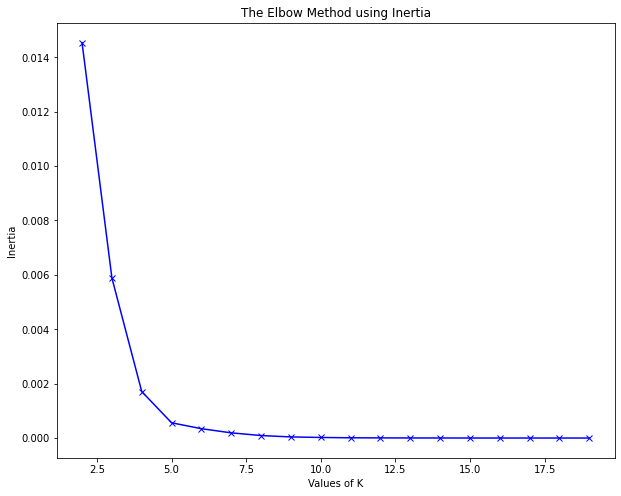

In [ ]:
# find 'k' value by Elbow Method
plt.figure(figsize=[10, 8])
inertia=[]
range_val=range(2,20)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(X)
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

Here,We saw that the optimum K value is 4 so we will have a resulting of 4 clusters.

In [ ]:
kclusters = 4

toronto_grouped_clustering = ita.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 3, 1, 1, 0, 1, 1], dtype=int32)

In [ ]:
# unique value in target column
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

 Now create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [ ]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = ita.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [ ]:
to_merged.head()

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.000000,1
1,"Alderwood, Long Branch",0.000000,1
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,1
3,Bayview Village,0.000000,1
4,"Bedford Park, Lawrence Manor East",0.136364,3


In [ ]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(2154, 9)


,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,1,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,1,43.794200,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,1,43.794200,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,1,43.794200,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink
1,"Alderwood, Long Branch",0.0,1,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place


In [ ]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.tail()

(2154, 9)


,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Drums N Flats,43.735035,-79.420040,Comfort Food Restaurant
4,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Darbar Persian Grill,43.735484,-79.420006,Restaurant
4,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Aroma Espresso Bar,43.735975,-79.420391,Café
4,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Dino's No Frills,43.730699,-79.418535,Grocery Store
4,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Issmi Sushi,43.735269,-79.419983,Sushi Restaurant


Lets check how many Italian Restaurant are there

In [ ]:
to_merged['Venue Category'].value_counts()['Italian Restaurant']

39

We see that there are a total of **46** locations with Italian Restaurants in Toronto  
We will create a new dataframe with the Neighborhood and Italian Restaurants

## 6.2. Visualize Clustering on Google Map

In [ ]:
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

### ***Warning :***
*If we run the above cell,we can see the visualization on Google Map but when we'll upload this notebook on **Github** the Map visualization will not show. As Github doesn't support Google Map Visualization.*
*So i've uploaded the Map visualization image on next cell from my drive.* 


<img src="https://drive.google.com/uc?export=view&id=1Q_kkL6SA_VysraN1kDWfRL2EL45NoAwy" alt="Google Map Visualization">



## 6.2. How many Neighborhoods per Cluster?


In [ ]:
ita["Cluster Labels"] = kmeans.labels_
ita.head()

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.000000,1
1,"Alderwood, Long Branch",0.000000,1
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,1
3,Bayview Village,0.000000,1
4,"Bedford Park, Lawrence Manor East",0.136364,3


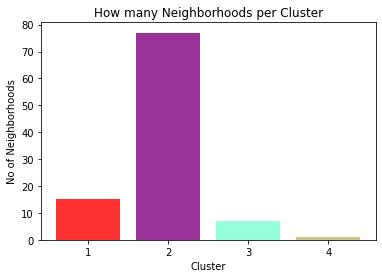

In [ ]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [ ]:
# How many neighborhoods in each cluster
ita['Cluster Labels'].value_counts()

1    77
0    15
2     7
3     1
Name: Cluster Labels, dtype: int64

## 6.3. Analysis of each Cluster

### Cluster 1

In [ ]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighborhood']]
df_new.head()

,Borough,Neighborhood
0,North York,Parkwoods
1,North York,Victoria Village
2,Downtown Toronto,"Regent Park, Harbourfront"
3,North York,"Lawrence Manor, Lawrence Heights"
4,Queen's Park,Ontario Provincial Government


In [ ]:
# Red 

cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,"Regent Park, Harbourfront",0.021739,0,43.65426,-79.360636,GW General,43.650495,-79.357538,Antique Shop
1,Downtown Toronto,"Regent Park, Harbourfront",0.021739,0,43.65426,-79.360636,Nava Social,43.656678,-79.356516,Café
2,Downtown Toronto,"Regent Park, Harbourfront",0.021739,0,43.65426,-79.360636,Copper Branch,43.653475,-79.355458,Vegetarian / Vegan Restaurant
3,Downtown Toronto,"Regent Park, Harbourfront",0.021739,0,43.65426,-79.360636,The Healthy Road,43.656265,-79.357119,Health Food Store
4,Downtown Toronto,"Regent Park, Harbourfront",0.021739,0,43.65426,-79.360636,Residence & Conference Centre,43.653040,-79.357040,Hotel


### Cluster 2

In [ ]:
# Purple 
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')
df_cluster2.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,0.0,1,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,Parkwoods,0.0,1,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,North York,Parkwoods,0.0,1,43.753259,-79.329656,Brookbanks Pool,43.751389,-79.332184,Pool
3,North York,Parkwoods,0.0,1,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
4,North York,Victoria Village,0.0,1,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant


### Cluster 3

In [ ]:
# Blue
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Don Mills South,0.052632,2,43.7259,-79.340923,C&C Supermarket,43.725556,-79.341667,Grocery Store
1,North York,Don Mills South,0.052632,2,43.7259,-79.340923,Japanese Canadian Cultural Centre,43.726429,-79.334971,Art Gallery
2,North York,Don Mills South,0.052632,2,43.7259,-79.340923,Tim Hortons,43.722897,-79.339117,Coffee Shop
3,North York,Don Mills South,0.052632,2,43.7259,-79.340923,Asian Legend,43.726591,-79.342188,Dim Sum Restaurant
4,North York,Don Mills South,0.052632,2,43.7259,-79.340923,Real Canadian Superstore,43.722704,-79.337508,Supermarket


### Cluster 4

In [ ]:
# Turquoise
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighborhood')
df_cluster4.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Subway,43.731485,-79.419550,Sandwich Place
1,North York,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Rossini Restaurant,43.735309,-79.420187,Italian Restaurant
2,North York,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,McDonald's,43.732540,-79.419796,Fast Food Restaurant
3,North York,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Bruno's Fine Food,43.736642,-79.419870,Butcher
4,North York,"Bedford Park, Lawrence Manor East",0.136364,3,43.733283,-79.41975,Safari Bar and Grill,43.729051,-79.418109,American Restaurant


## 6.4. Number of neighborhoods per cluster *vs* Average number of Italian Restaurants in each Cluster

Text(0.5, 1.0, 'Average number of Italian Restaurants per Cluster')

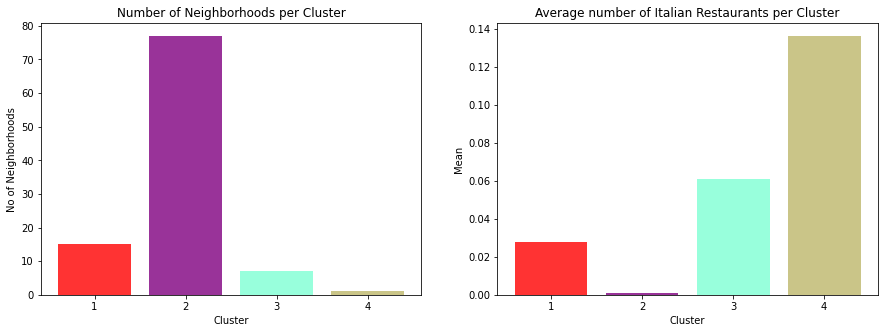

In [ ]:
plt.figure(figsize=(15,5))

# Plot-1 ( Number of Neighborhoods per Cluster )

plt.subplot(1,2,1)
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf_1 = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf_1, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('Number of Neighborhoods per Cluster')

# Plot-2 ( Average number of Italian Restaurants per Cluster )

plt.subplot(1, 2, 2)
clusters_mean = [df_cluster1['Italian Restaurant'].mean(),df_cluster2['Italian Restaurant'].mean(),df_cluster3['Italian Restaurant'].mean(),
                df_cluster4['Italian Restaurant'].mean()]
y_pos = np.arange(len(objects))
perf_2 = clusters_mean
plt.bar(y_pos, perf_2, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Italian Restaurants per Cluster')


# **7. Conclusion**

The Neighborhoods located in the East Toronto area(cluster-3) have the highest average of Italian Restaurants which is represented by aquamarine colour. North York has second heighest number of Italian restaurants present. Looking at the nearby venues, the optimum place to put a new Italian Restaurant is in Victoria village,North York(cluster-1) as their are many Neighborhoods in that area but a little number of Italian Restaurants therefore, eliminating any competition.The second best Neighborhoods that have a great oppurtunity would be in areas such as Queen's Park which is in Cluster 4.Having 70 neighborhoods in the area with no Italian Restaurants gives a good oppurtunity for opening up a new restaurant. This concludes the optimal findings for this project and recommends the entrepreneur to open an authentic Italian restaurant in these locations with little to no competition. Nonetheless, if the food is authentic, affordable and good taste, I am confident that it will have great following everywhere.

**Here we take an Italian Restaurant as an example. We can do the same process to find the best place or neighborhood**
- to open a start up company 
- to stay on rent for bachelors
- to start a side business for middle class people
- to open a camp for any kind of servey
- to release a new product for checking the success rate
  

# **8. Future Work**

* Apply different types of clustering algorithms to cluster the 
neighborhoods.
* Consider other food vanues,market area etc. as features for clustering.
* Consider more then 100 vanues in a neighborhood for analysis using Foursquare api.
